In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [359]:
data = pd.read_csv('data/coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Import missing Python Libararies

In [360]:
import missingno as msno
import plotly.express as px

2. Investigate the dataset for missing or problematic data.

## Check for duplicates

74 duplicates entries found

In [361]:
print("Data before removing duplicate: ", data.shape)

Data before removing duplicate:  (12684, 26)


In [362]:
#remove duplicates
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

After removing duplicates: (12610, 26)


### Check for missing values

There are missing values for car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50

In [363]:
#Find total sum of missing values in each attribute of coupon.csv

missingvalues = data.isnull().sum().sort_values(ascending=False)
print(missingvalues)

car                     12502
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 150
RestaurantLessThan20      129
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64


### Investigate missing data using missingno library

Missing data found for car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50. Another way to figure out missing data.

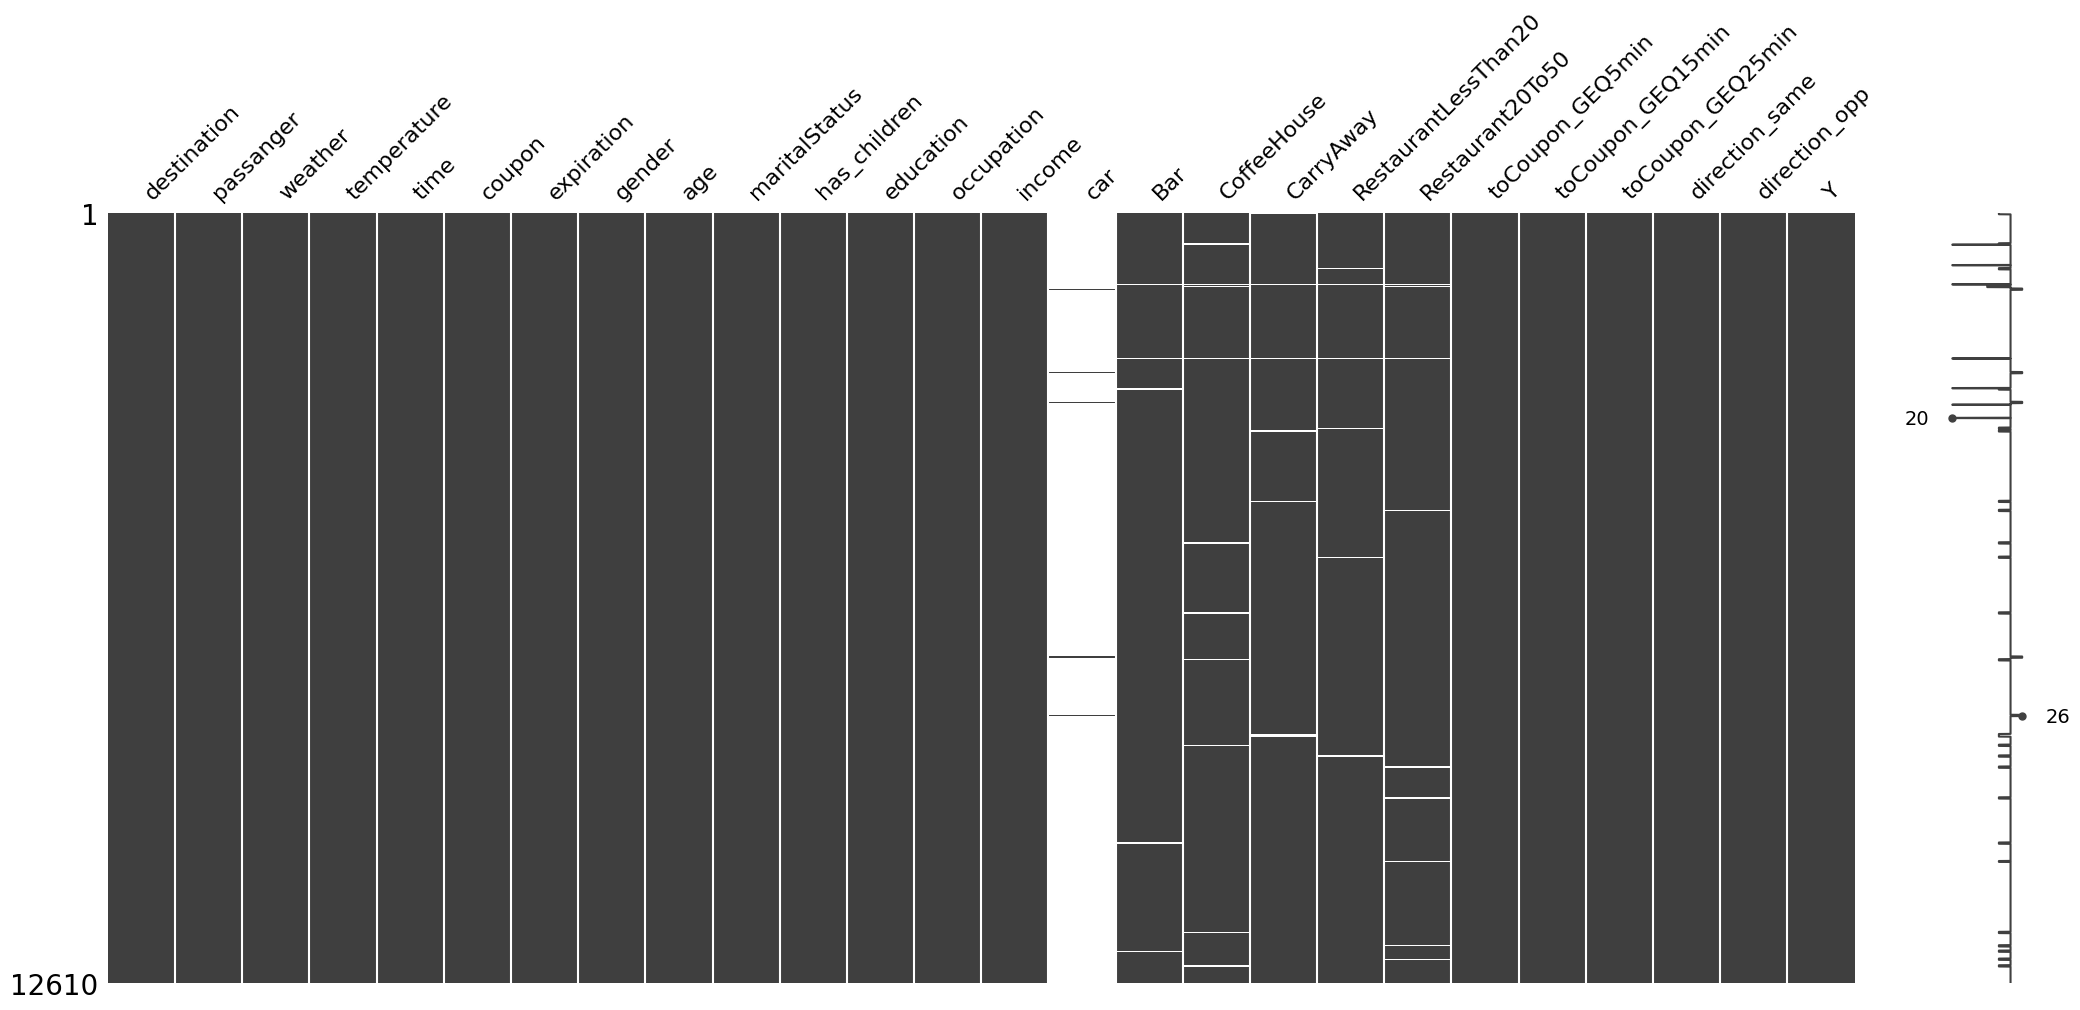

In [ ]:
#Use missingno to visualize the missing values
msno.matrix(data)
plt.show()

### Missing value % to determine appropriate action for dropping, replacing missing values

Car values is 99% missing. Hence drop the column.
All other missing values are  < 5%. We can replace the missing values for those cases.

In [ ]:
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.143537
Bar                      0.848533
CoffeeHouse              1.720856
CarryAway                1.189532
RestaurantLessThan20     1.022998
Restaurant20To50         1.498810
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


### Understand missing data correlation with each other

The light color of the plot shows that the missing values are at random or Missing Completely at Random (MCAR) → no pattern in missingness


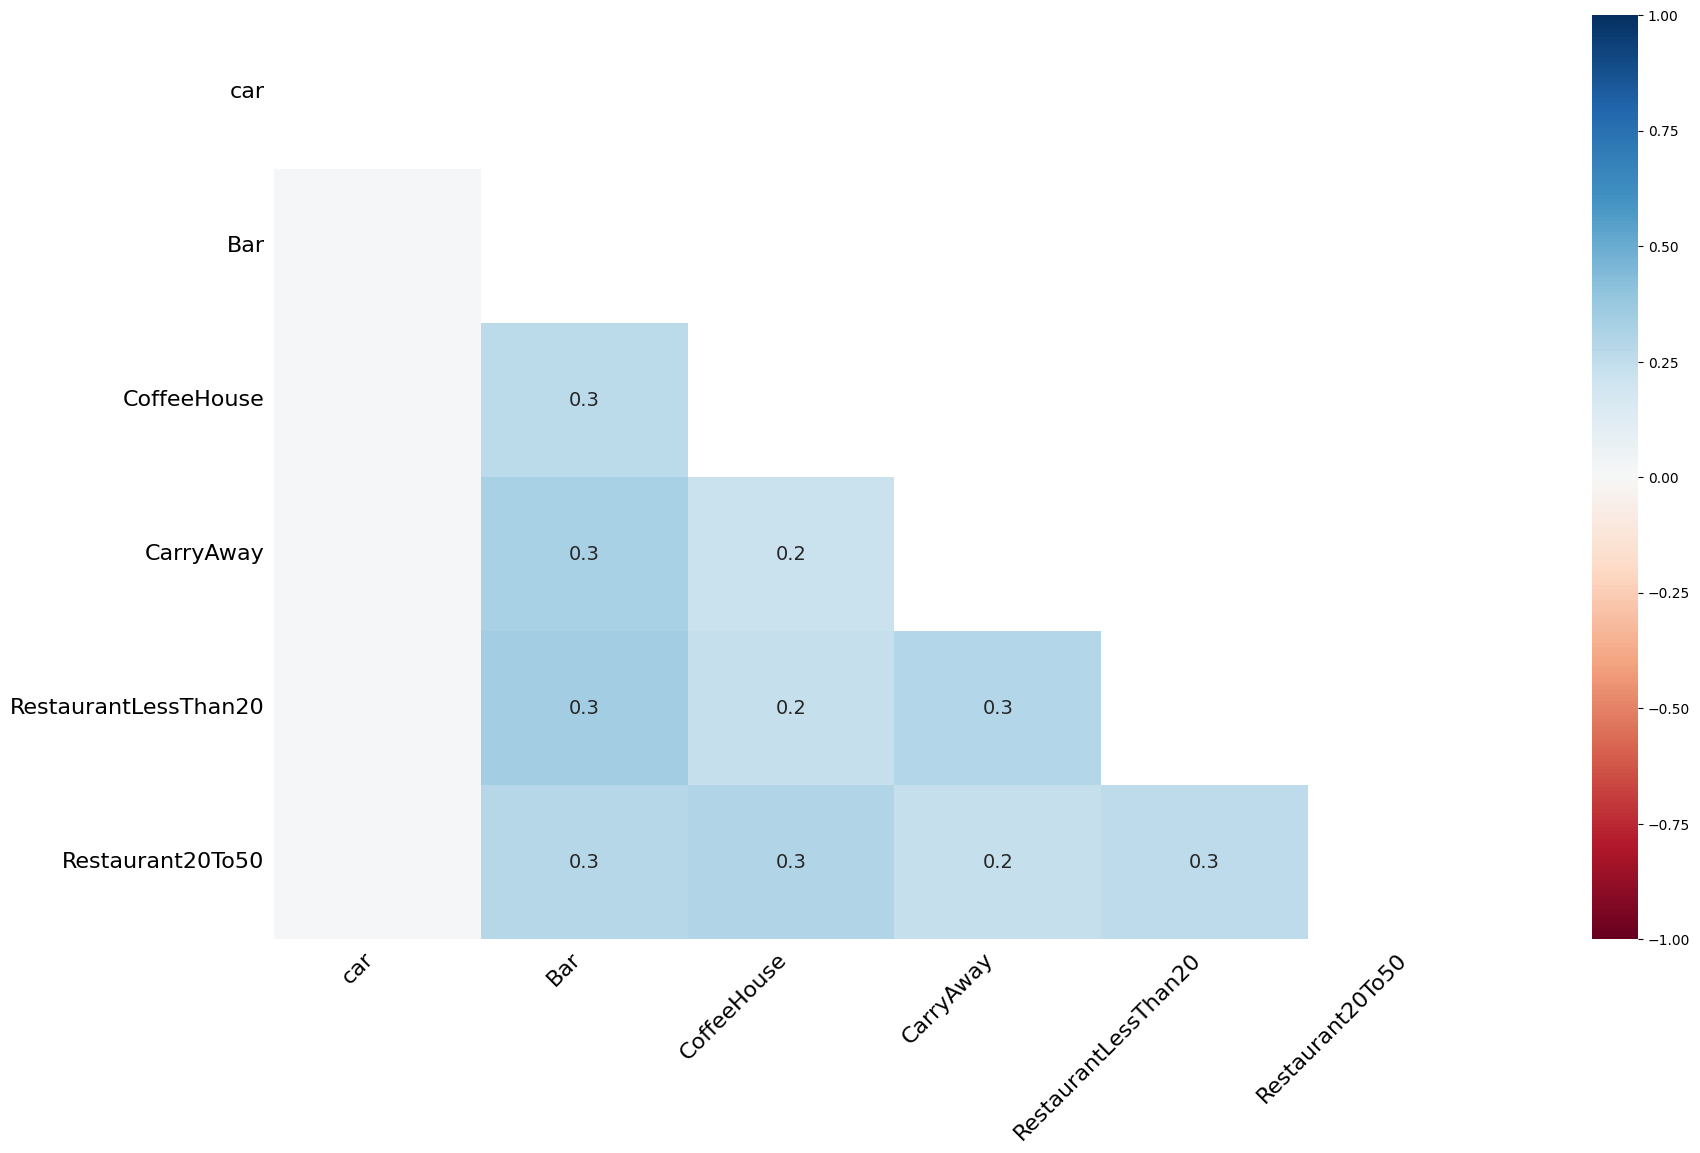

In [ ]:
#Use missingno heatmap to visualize the missing values
msno.heatmap(data)
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

### Drop car column from dataframe

In [367]:
data = data.drop('car', axis =1)

###Replace missing values for Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 using mode

In [368]:
# Replace missing values for Bar column with mode value
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)

# Replace missing values for CoffeeHouse column with mode value
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)

# Replace missing values for CarryAway column with mode value
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)

# Replace missing values for RestaurantLessThan20 column with mode value
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)

# Replace missing values for Restaurant20To50 column with mode value
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)

<ipython-input-368-20aad7d2439b>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-368-20aad7d2439b>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

### Validate missing data % is fixed

All % data is 0.

In [ ]:
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent)

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64


### Rename passanger column to Passenger

In [370]:
data.rename(columns={'passanger': 'passenger'}, inplace=True)

### Create another column for Age called AgeN with integer values to better visualize data against age

Replace below21 to 20.  
Replace 50plus to 55.  
Cast column to type int.  

In [371]:
data['AgeN'] = data['age'].str.replace('below21', '20').str.replace('50plus', '55').astype(int)
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,AgeN
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,1,21
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,0,21
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,21
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,21
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,21


4. What proportion of the total observations chose to accept the coupon?



###Findings on total accepted coupons

*   Out of 12610 unique drivers 56.76% accepted the coupons
*   Rest 43.24% drivers didn't accept the coupon



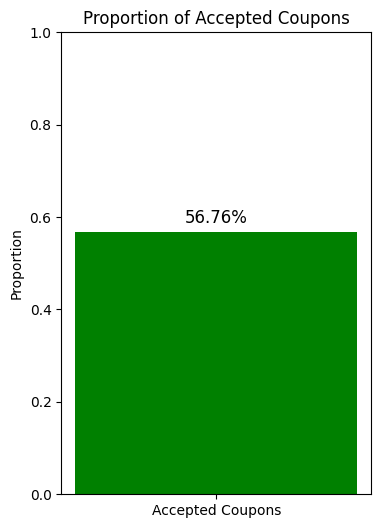

<Figure size 640x480 with 0 Axes>

In [372]:
# Calculate the proportion of accepted coupons
proportion_accepted = data['Y'].mean()

# Set figure size
plt.figure(figsize=(4, 6))

# Plot the proportion as a thinner bar
plt.bar(["Accepted Coupons"], [proportion_accepted], color='green', width=0.4)

# Add labels and title
plt.ylabel("Proportion")
plt.title("Proportion of Accepted Coupons")

# Show the percentage value on top of the bar
plt.text(0, proportion_accepted + 0.02, f"{proportion_accepted:.2%}", ha='center', fontsize=12)

# Adjust y-axis limits for better scaling
plt.ylim(0, 1)

# Show the plot
plt.show()

#Save figure
plt.savefig('images/image1.png')


5. Use a bar plot to visualize the `coupon` column.

###Findings for acceptance of the coupon based on a bar graph



*   Around 7000 drivers from total of 12610 unique drivers accepted the coupon
*   5000+ drivers rejected the coupons



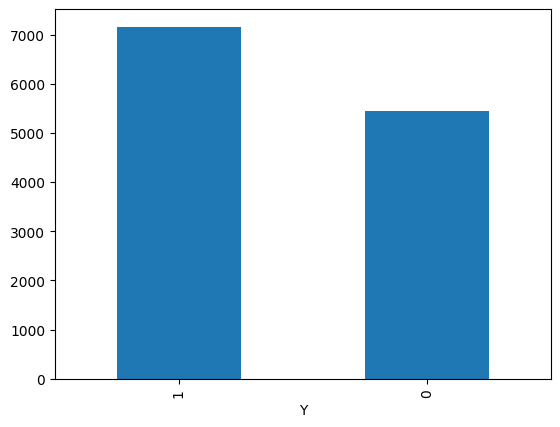

<Figure size 640x480 with 0 Axes>

In [373]:
data['Y'].value_counts().plot(kind='bar')
plt.show()

#Save figure
plt.savefig('images/image2.png')

6. Use a histogram to visualize the temperature column.

###Findings on the temperature

Teperature for about 6000 drivers on the day was between 75 to 80 F.  
For 4000 drivers the temparature was in mid 50s to 60 F.
For a small 2000 odd drivers temparature on the day was in early 30s.

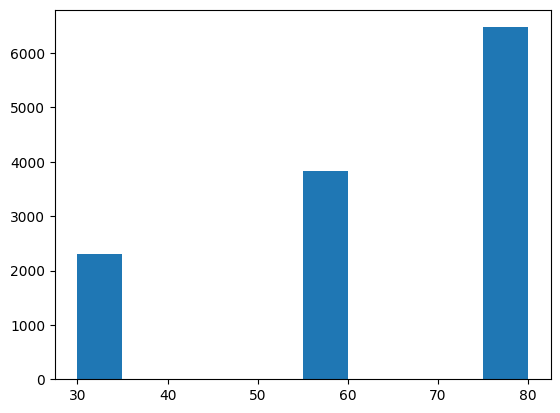

<Figure size 640x480 with 0 Axes>

In [374]:
plt.hist(data['temperature'])
plt.show()

#Save figure
plt.savefig('images/image3.png')

### Some other findings



*   Drivers with no children tend to accept the coupons more indicating that drivers with children may have constraints that deters them from accepting coupons.
*   Single drivers tend to accept the coupons more.
*   Drivers in the age group 21 to 26 tend to accept coupons more indicating a stable flow of income.



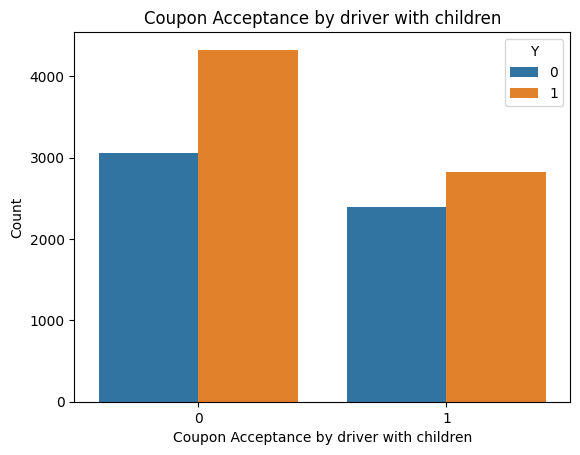

<Figure size 640x480 with 0 Axes>

In [375]:
sns.countplot(x='has_children', hue='Y', data=data)
plt.title("Coupon Acceptance by driver with children")
plt.xlabel("Coupon Acceptance by driver with children")
plt.ylabel("Count") # Rotate labels for readability
plt.show()

#Save figure
plt.savefig('images/image4.png')

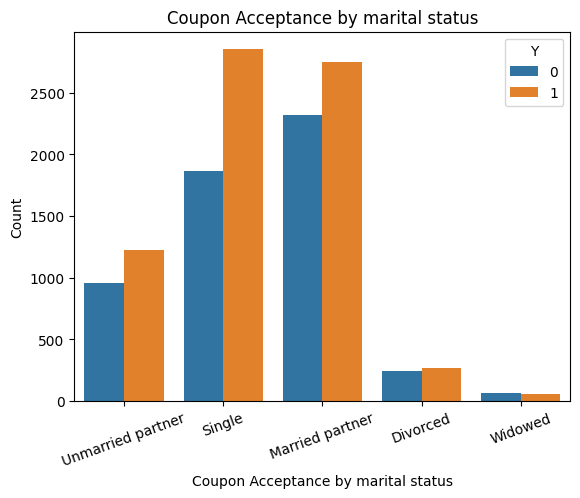

<Figure size 640x480 with 0 Axes>

In [376]:
sns.countplot(x='maritalStatus', hue='Y', data=data)
plt.title("Coupon Acceptance by marital status")
plt.xlabel("Coupon Acceptance by marital status")
plt.ylabel("Count")
plt.xticks(rotation=20)  # Rotate labels for readability
plt.show()

#Save figure
plt.savefig('images/image5.png')

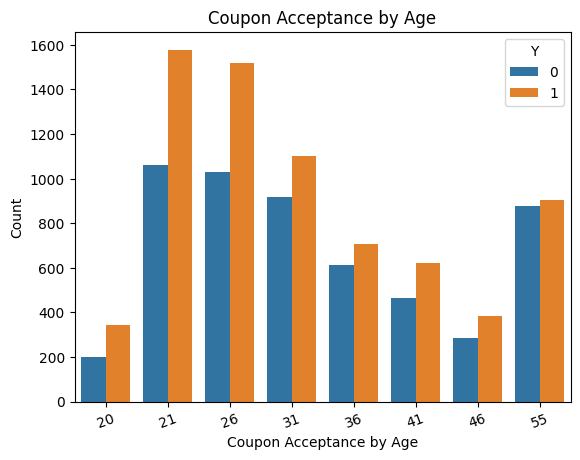

<Figure size 640x480 with 0 Axes>

In [377]:
sns.countplot(x='AgeN', hue='Y', data=data)
plt.title("Coupon Acceptance by Age")
plt.xlabel("Coupon Acceptance by Age")
plt.ylabel("Count")
plt.xticks(rotation=20)  # Rotate labels for readability
plt.show()

#Save figure
plt.savefig('images/image6.png')

### Scatter plot for Age and Marital status distribution for drivers who particiated in the survey

In [378]:
px.scatter(data_frame=data, x = 'income', y = 'AgeN', color = 'maritalStatus',size = 'AgeN')
#Save figure
plt.savefig('images/image7.png')

<Figure size 640x480 with 0 Axes>

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [379]:
bardf = data.query("coupon == 'Bar'")
bardf.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,AgeN
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,21
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,1,0,1,21
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,1,0,1,0,21
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,21


2. What proportion of bar coupons were accepted?


### 41% of the drivers accepted bar coupons

There is a high rejection of bar coupons by drivers who 'never' been to bar.
On the other hand drivers who frequnted bars 1~3 tend to somewhat accept bar coupons than rejecting them.

In [380]:
# Calculate proportion
proportion_bar_accepted = bardf['Y'].mean()

# Print result
print(f"Proportion of accepted bar coupons: {proportion_bar_accepted:.2%}")

Proportion of accepted bar coupons: 41.00%


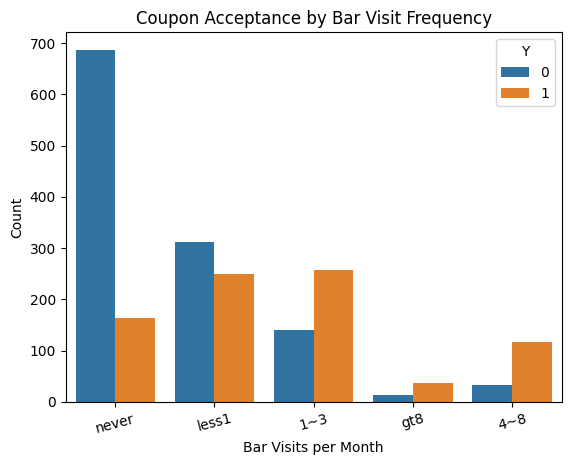

<Figure size 640x480 with 0 Axes>

In [381]:
sns.countplot(x='Bar', hue='Y', data=bardf)
plt.title("Coupon Acceptance by Bar Visit Frequency")
plt.xlabel("Bar Visits per Month")
plt.ylabel("Count")
plt.xticks(rotation=15)  # Rotate labels for readability
plt.show()
#Save figure
plt.savefig('images/image8.png')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


### Around 76.9% of drivers who frequents bar more than 3 times a month accepted the bar coupon. Close to half of the drivers who frequented the bar 3 or fewer times rejected the bar coupon. Targeting the coupons to drivers who frequents bar more than 3 times a month will result in better conversion of coupons.

In [382]:
# Drivers who frequent bar 3 or fewer times
bar_coupon_acceptance_1_3 = bardf.query("Bar == ['1~3','less1']")['Y'].mean()

# Drivers who frequent bar more than 3 times
bar_coupon_acceptance_4_8 = bardf.query("Bar == ['4~8','gt8']")['Y'].mean()

# Print result
print(f"Proportion of accepted bar coupons for those who went to a bar 3 or fewer times: {bar_coupon_acceptance_1_3:.2%}")
print(f"Proportion of accepted bar coupons for those who went to a bar more than 3 times: {bar_coupon_acceptance_4_8:.2%}")

Proportion of accepted bar coupons for those who went to a bar 3 or fewer times: 52.81%
Proportion of accepted bar coupons for those who went to a bar more than 3 times: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


### Around 70% of the drivers over 25 years of age who frequent bar more than once a month accepted the coupons compared to all other drivers whose acceptance is 33.5%. Bar coupons works better when targeted to drivers over 25 years and frequent bar more than once a month.

In [383]:
# Define bar visit categories that mean "more than once a month"
bar_frequent = ['1~3','4~8', 'gt8']

# Define valid ages over 25 (already all ages listed are >25)
age_over_25 = ['26', '31', '36', '41', '46', '50plus']

# Group 1: Frequent bar visitors & age > 25
group_1 = bardf[(bardf['Bar'].isin(bar_frequent)) & (bardf['age'].isin(age_over_25))]

# Group 2: Everyone else
group_2 = bardf[~bardf.index.isin(group_1.index)]

# Print result
print(f"Proportion of accepted bar coupons for those over 25 years: {group_1['Y']. mean():.2%}")
print(f"Proportion of accepted bar coupons for all others: {group_2['Y']. mean():.2%}")



Proportion of accepted bar coupons for those over 25 years: 69.52%
Proportion of accepted bar coupons for all others: 33.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


### Drivers with partners and friends and who visit bar more than once a month are more likely to accept bar coupons compared to all others.

In [384]:
# Define bar visits for more than once a month
bar_frequent = ['1~3','4~8', 'gt8']

# Define passengers with driver who are not kids
passenger_type = ['Friend(s)', 'Partner']

# Define invalid aoccupation for drivers
invalid_occupation = ['Farming Fishing & Forestry']
not_farming_fishing_forestry = ~bardf['occupation'].isin(invalid_occupation)

# Group 1: Bar visits for drivers who frequent bar more than once a month with passengers other than kids and not in Farming Fishing & Forestry occupation
group_1 = bardf[(bardf['Bar'].isin(bar_frequent)) & (bardf['passenger'].isin(passenger_type)) & not_farming_fishing_forestry]

# Group 2: Everyone else
group_2 = bardf[~bardf.index.isin(group_1.index)]

# Print result
print(f"Proportion of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {group_1['Y']. mean():.2%}")
print(f"Proportion of accepted bar coupons for all others: {group_2['Y']. mean():.2%}")



Proportion of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.79%
Proportion of accepted bar coupons for all others: 37.69%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



### Drivers with partners and friends and who visit bar more than once a month and not widowed or drivers go to bars more than once a month and are under the age of 30 are more likely to accept bar coupons compared drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.

In [385]:
# Define bar visits for more than once a month
bar_frequent = ['1~3','4~8', 'gt8']

# Define passengers with driver who are not kids
passenger_type = ['Friend(s)', 'Partner']

# Define marital status for drivers
marital_status_widowed = ['Widowed']

# Select everyone other than widowed
not_widowed = ~bardf['maritalStatus'].isin(marital_status_widowed)

# Define valid ages under 30
age_under_30 = ['21', '26', 'below21']

# Define cheap restaurants more than 4 times a month
cheap_restaurant = ['gt8', '4~8']

# Define income less than 50K
income_under_50K = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']

# Define invalid aoccupation for drivers
invalid_occupation = ['Farming Fishing & Forestry']
not_farming_fishing_forestry = ~bardf['occupation'].isin(invalid_occupation)

# Group 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_1 = bardf[(bardf['Bar'].isin(bar_frequent)) & (bardf['passenger'].isin(passenger_type)) & not_farming_fishing_forestry]

# Group 2: Drivers who go to bars more than once a month and are under the age of 30
group_2 = bardf[(bardf['Bar'].isin(bar_frequent)) & (bardf['age'].isin(age_under_30))]

# Group 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
group_3 = bardf[(bardf['RestaurantLessThan20'].isin(cheap_restaurant)) & (bardf['income'].isin(income_under_50K))]

print(f"Proportion of accepted bar coupons for for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed : {group_1['Y']. mean():.2%}")
print(f"Proportion of accepted bar coupons for drivers who go to bars more than once a month and are under the age of 30: {group_2['Y']. mean():.2%}")
print(f"Proportion of accepted bar coupons for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {group_3['Y']. mean():.2%}")

Proportion of accepted bar coupons for for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed : 71.79%
Proportion of accepted bar coupons for drivers who go to bars more than once a month and are under the age of 30: 72.17%
Proportion of accepted bar coupons for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### **Hypothesis on Drivers Who Accepted Bar Coupons**  

*   41% of the drivers accepted bar coupons. Success rate of bar coupons is less than 50%.  
*   Around 76.9% of drivers who frequents bar more than 3 times a month accepted the bar coupon. Close to half of the drivers who frequented the bar 3 or fewer times rejected the bar coupon.
*   Around 70% of the drivers over 25 years of age who frequent bar more than once a month accepted the coupons compared to all other drivers whose acceptance is 33.5%.
*   Drivers with partners and friends and who visit bar more than once a month are more likely to accept bar coupons compared to all others.
*   Drivers with partners and friends and who visit bar more than once a month and not widowed or drivers go to bars more than once a month and are under the age of 30 are more likely to accept bar coupons compared drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.

---

**Next steps based on limited evidence:**
*   Targeting the coupons to drivers who frequents bar more than 3 times a month will result in better conversion of coupons.
*   Bar coupons works better when targeted to drivers over 25 years and frequent bar more than once a month.
*   Drivers with partners and friends and who visit bar more than once a month are better target for bar coupons.









### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Independent inevstigation on Coffee House Coupons

In [ ]:
# Select CoffeeHouse coupon data
coffeehousedf = data.query("coupon == 'Coffee House'")
coffeehousedf.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,AgeN
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,0,21
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,21
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,21
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,21
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,0,21


2. Proportion of accepted coffee house coupon

In [387]:
# Calculate proportion
proportion_coffee_house_accepted = coffeehousedf['Y'].mean()

# Print result
print(f"Proportion of accepted bar coupons: {proportion_coffee_house_accepted:.2%}")

Proportion of accepted bar coupons: 49.86%


2. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

In [ ]:
# Drivers who frequent coffee house 3 or fewer times
coffee_house_coupon_acceptance_1_3 = coffeehousedf.query("CoffeeHouse == ['1~3','less1']")['Y'].mean()

# Drivers who frequent coffee house more than 3 times
coffee_house_coupon_acceptance_4_8 = coffeehousedf.query("CoffeeHouse == ['4~8','gt8']")['Y'].mean()

# Print result
print(f"Proportion of accepted bar coupons for those who went to a coffee house 3 or fewer times: {coffee_house_coupon_acceptance_1_3:.2%}")
print(f"Proportion of accepted bar coupons for those who went to a coffee house more than 3 times: {coffee_house_coupon_acceptance_4_8:.2%}")

Proportion of accepted bar coupons for those who went to a coffee house 3 or fewer times: 55.91%
Proportion of accepted bar coupons for those who went to a coffee house more than 3 times: 67.50%


3. Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others. Is there a difference?

In [ ]:
# Define bar visit categories that mean "more than once a month"
coffee_house_frequent = ['1~3','4~8', 'gt8']

# Define valid ages over 25 (already all ages listed are >25)
age_over_25 = ['26', '31', '36', '41', '46', '50plus']

# Group 1: Frequent coffee house visitors & age > 25
group_1 = coffeehousedf[(coffeehousedf['CoffeeHouse'].isin(coffee_house_frequent)) & (coffeehousedf['age'].isin(age_over_25))]

# Group 2: Everyone else
group_2 = coffeehousedf[~coffeehousedf.index.isin(group_1.index)]

# Print result
print(f"Proportion of accepted CoffeeHouse coupons for those over 25 years: {group_1['Y']. mean():.2%}")
print(f"Proportion of accepted CoffeeHouse coupons for all others: {group_2['Y']. mean():.2%}")

Proportion of accepted CoffeeHouse coupons for those over 25 years: 63.81%
Proportion of accepted CoffeeHouse coupons for all others: 42.69%


4. Compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [ ]:
# Define coffee house visits for more than once a month
coffee_house_frequent = ['1~3','4~8', 'gt8']

# Define passengers with driver who are not kids
passenger_type = ['Friend(s)', 'Partner']

# Define invalid aoccupation for drivers
invalid_occupation = ['Farming Fishing & Forestry']
not_farming_fishing_forestry = ~coffeehousedf['occupation'].isin(invalid_occupation)

# Group 1: Coffee house visits for drivers who frequent bar more than once a month with passengers other than kids and not in Farming Fishing & Forestry occupation
group_1 = coffeehousedf[(coffeehousedf['CoffeeHouse'].isin(coffee_house_frequent)) & (coffeehousedf['passenger'].isin(passenger_type)) & not_farming_fishing_forestry]

# Group 2: Everyone else
group_2 = coffeehousedf[~coffeehousedf.index.isin(group_1.index)]

# Print result
print(f"Proportion of accepted coffee house coupons for those who frequent bar more than once a month with passengers other than kids and not in Farming Fishing & Forestry occupation: {group_1['Y']. mean():.2%}")
print(f"Proportion of accepted coffee house coupons for all others: {group_2['Y']. mean():.2%}")

Proportion of accepted coffee house coupons for those who frequent bar more than once a month with passengers other than kids and not in Farming Fishing & Forestry occupation: 76.63%
Proportion of accepted coffee house coupons for all others: 43.94%


5. Compare the accepatnce of coffee house coupn based on weather that day?

In [ ]:
# Define coffee_house visits for more than once a month
coffee_house_weather = ['Sunny']

# Group 1: Coffee house visits based on sunny weather
group_1 = coffeehousedf[(coffeehousedf['weather'].isin(coffee_house_weather))]

# Group 2: Coffee house visits based on other weather
group_2 = coffeehousedf[~coffeehousedf.index.isin(group_1.index)]

# Print result
print(f"Proportion of accepted coffee house coupons on a sunny day: {group_1['Y']. mean():.2%}")
print(f"Proportion of accepted coffee house coupons on other day: {group_2['Y']. mean():.2%}")

Proportion of accepted coffee house coupons on a sunny day: 50.27%
Proportion of accepted coffee house coupons on other day: 47.16%


### **Independent Hypothesis**

*  49.86% of the drivers accepted coffee house coupons. Success rate of coffee house coupons is around 50%.
*  Around 67.5% of drivers who frequents coffee house more than 3 times a month accepted the coffee house coupon. 56% of the drivers who frequented the coffee house 3 or fewer times accepted the coffee house coupon. Targeting the coupons to drivers who frequents coffee house more than 3 times a month will result in better conversion of coupons.
*  Around 63.8% of the drivers over 25 years of age who frequent coffee house more than once a month accepted the coupons compared to all other drivers whose acceptance is 33.5%. coffee house coupons works better when targeted to drivers over 25 years and frequent coffee house more than once a month.
*  Drivers with partners and friends and who visit coffee house more than once a month and not in Farming Fishing & Forestry occupation are more likely to accept coffee house coupons compared to all others.
*  Weather doesn't seem to determine if the drivers accept coffee house coupons as 50% accepted coupons on sunny day and 47% accepted coupons on rainy or snowy days.

---

**Next steps based on limited evidence:**
*   Targeting the coupons to drivers who frequents coffee house more than 3 times a month will result in better conversion of coupons.
*   Coffee house coupons works better when targeted to drivers over 25 years and frequent bar more than once a month.
*   Drivers with partners and friends and who visit bar more than once a month are better target for bar coupons.
*   Acceptance of the coupons may or moy not depend on the weather that day.



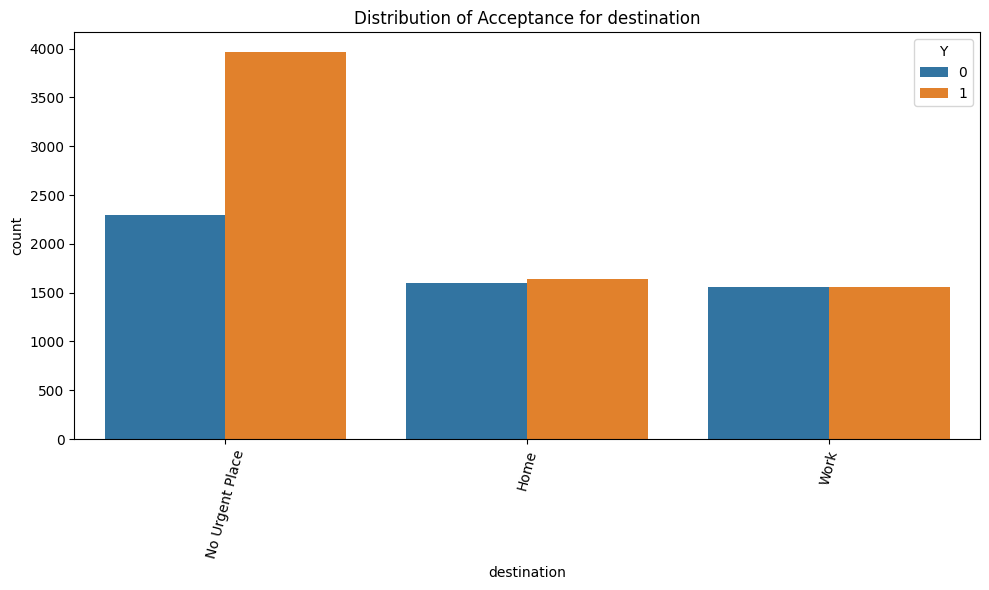

<Figure size 640x480 with 0 Axes>

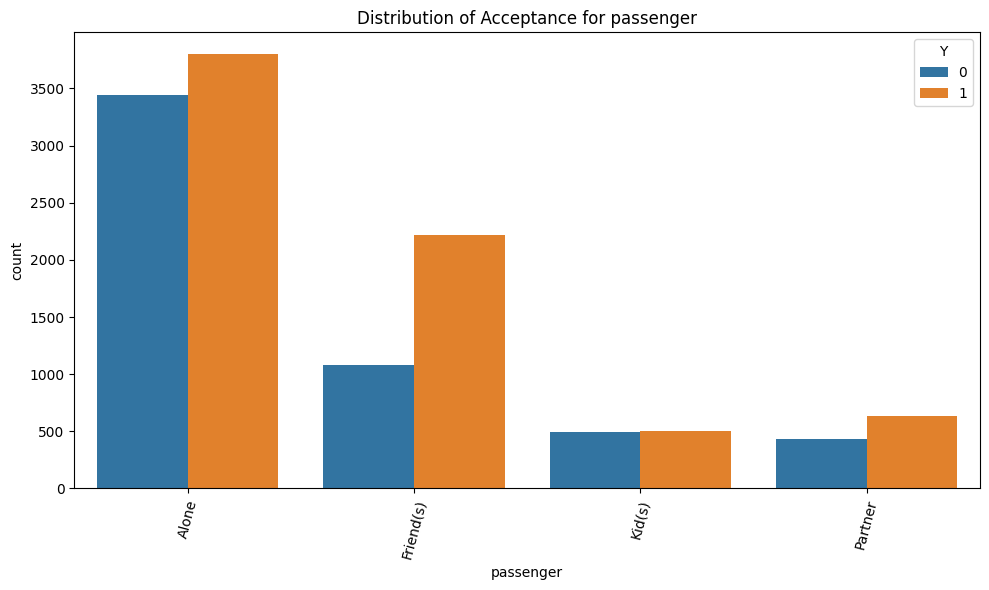

<Figure size 640x480 with 0 Axes>

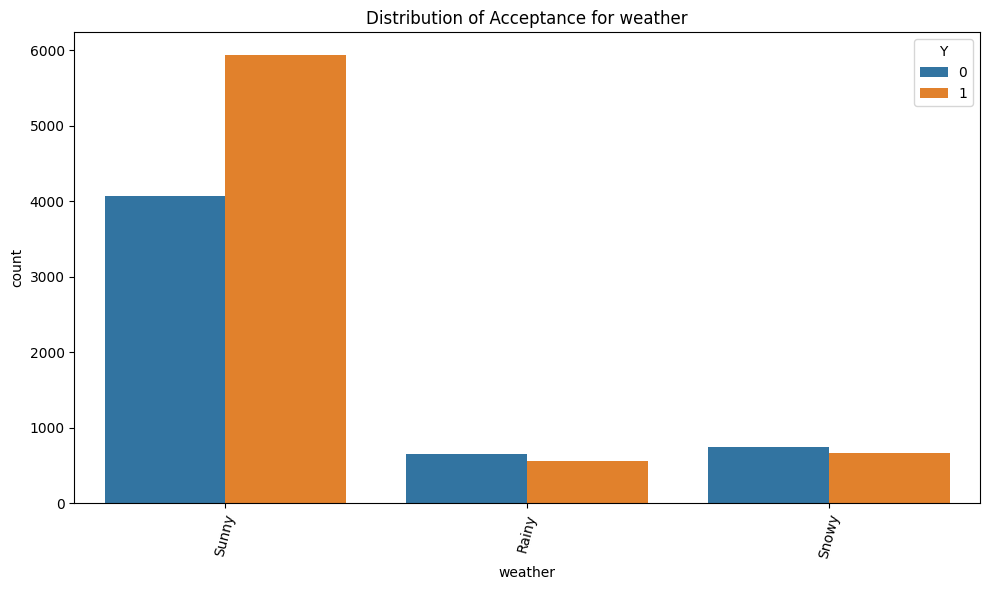

<Figure size 640x480 with 0 Axes>

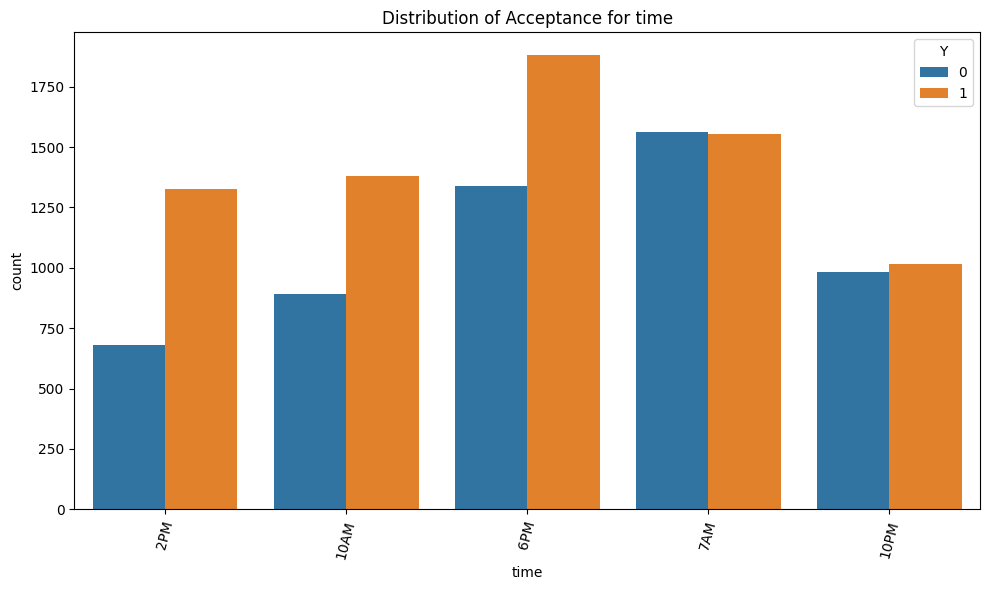

<Figure size 640x480 with 0 Axes>

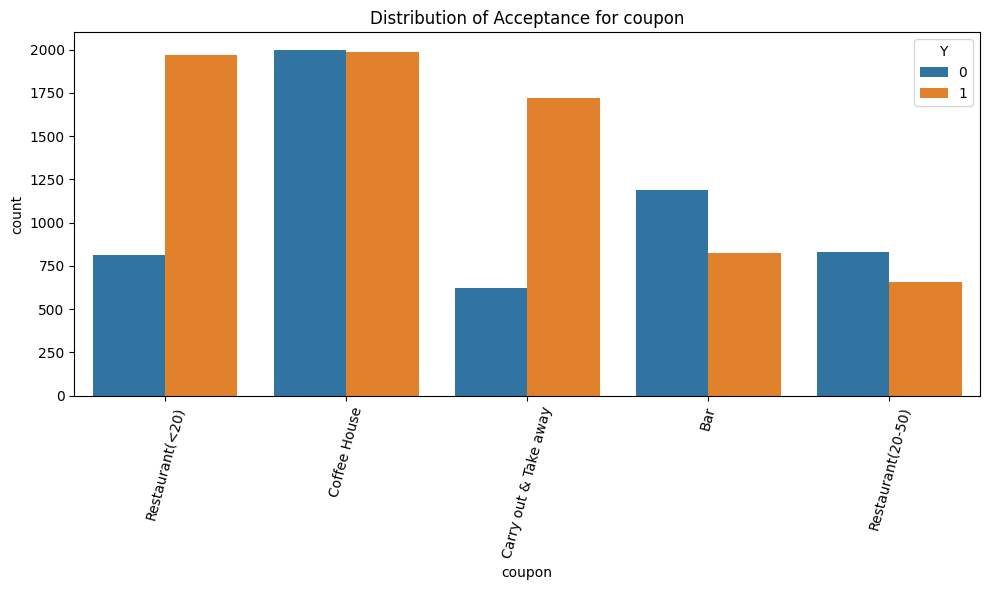

<Figure size 640x480 with 0 Axes>

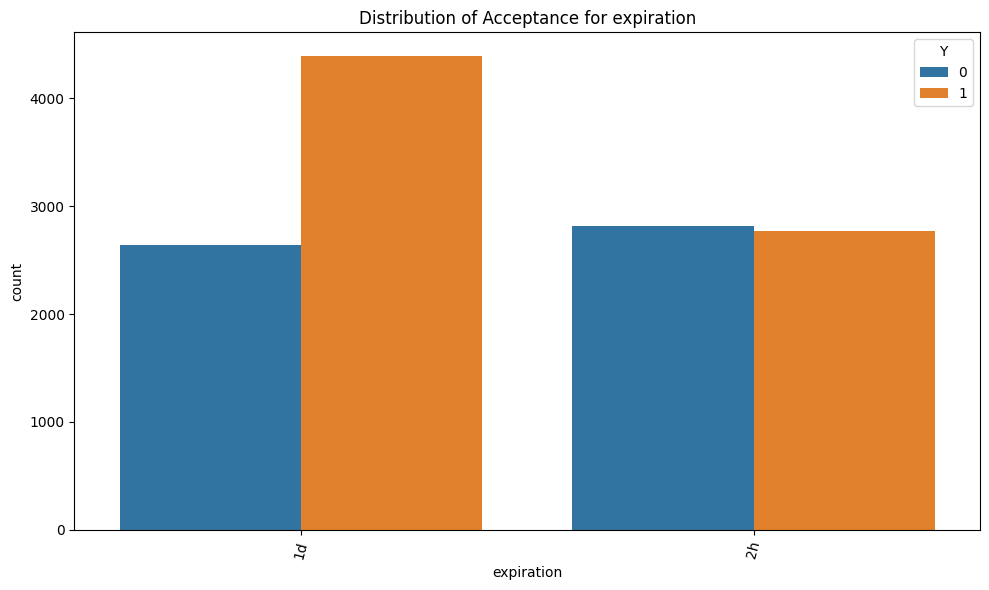

<Figure size 640x480 with 0 Axes>

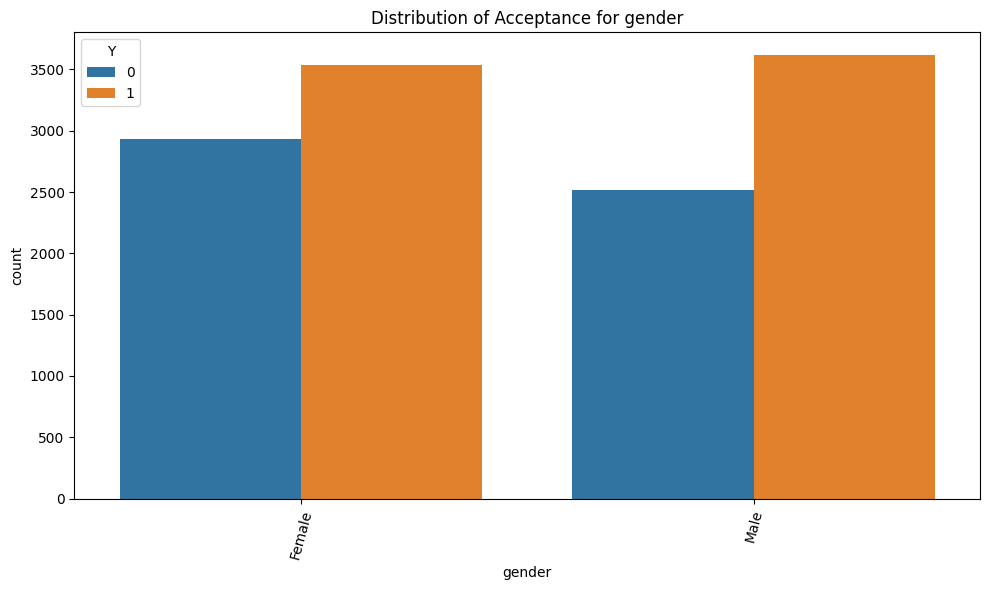

<Figure size 640x480 with 0 Axes>

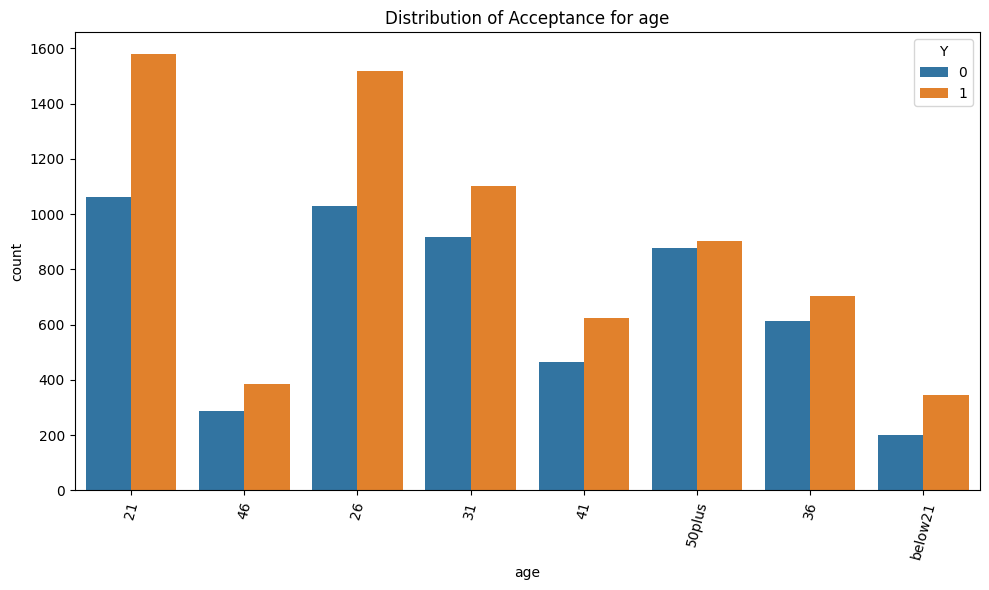

<Figure size 640x480 with 0 Axes>

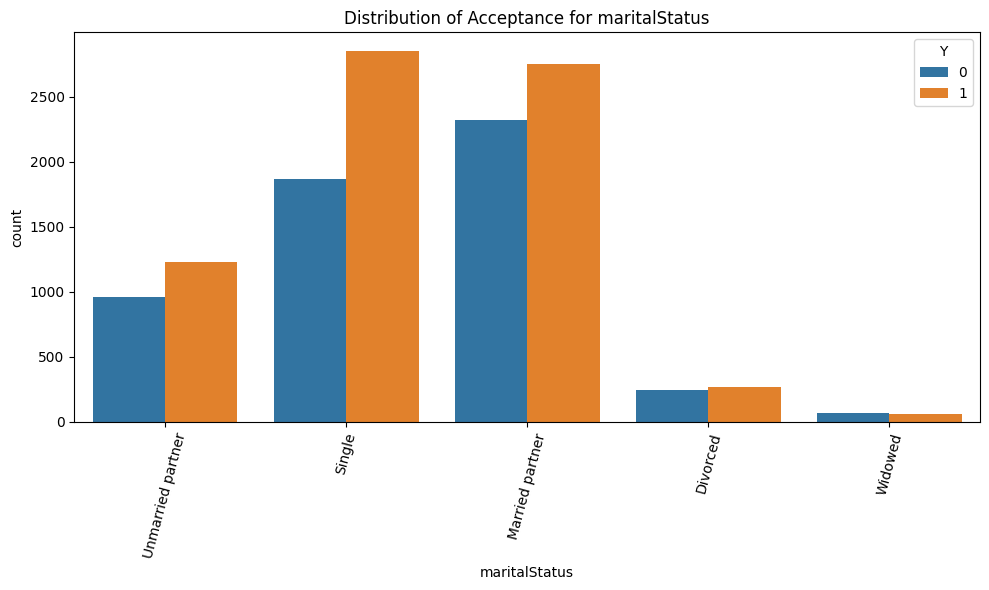

<Figure size 640x480 with 0 Axes>

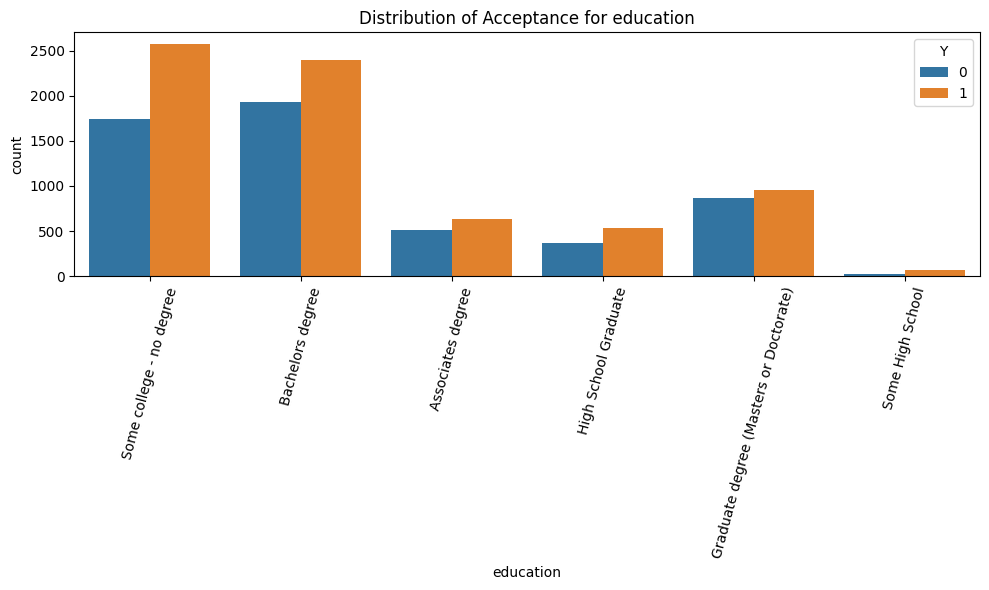

<Figure size 640x480 with 0 Axes>

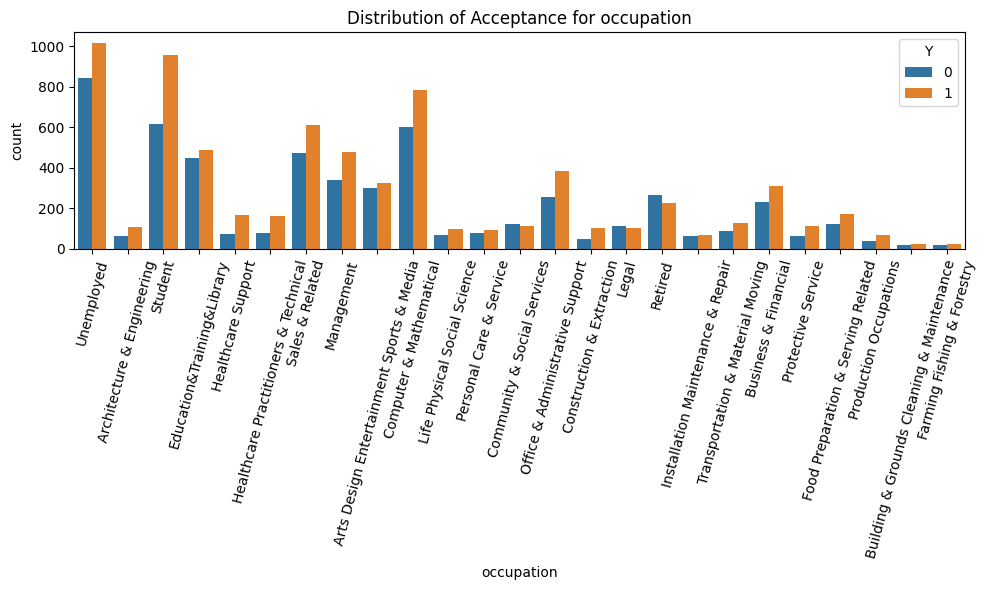

<Figure size 640x480 with 0 Axes>

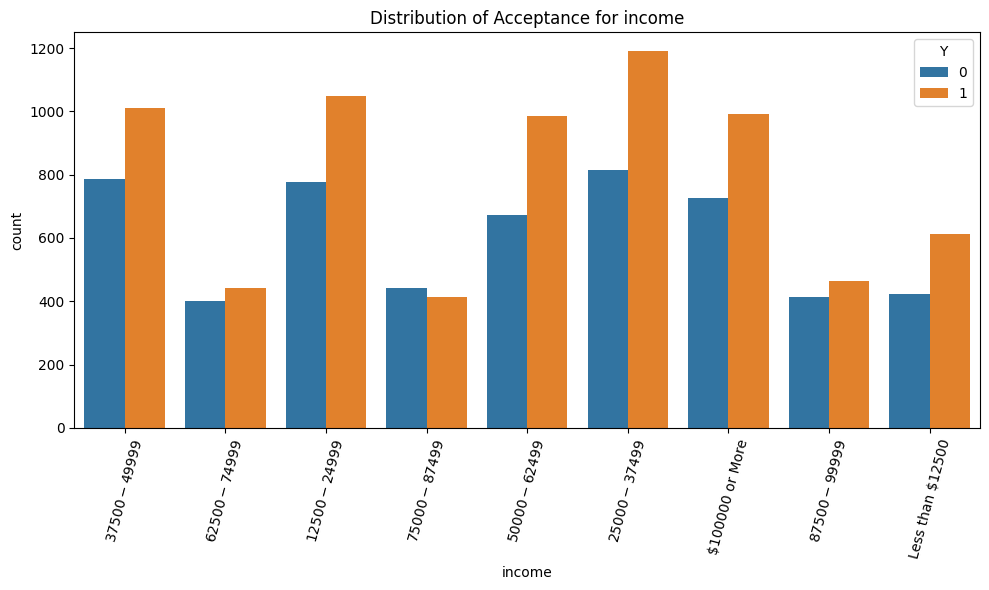

<Figure size 640x480 with 0 Axes>

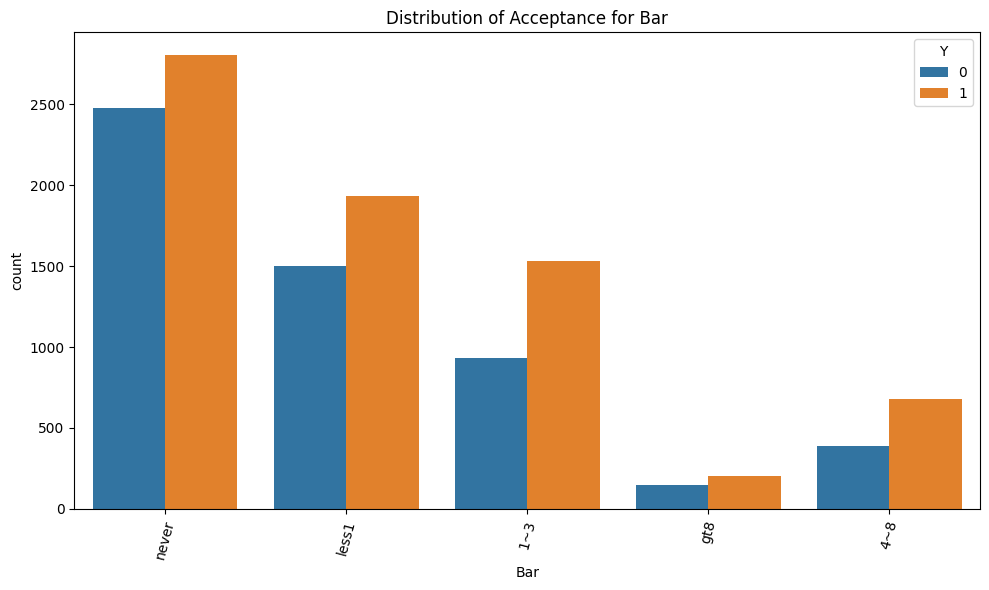

<Figure size 640x480 with 0 Axes>

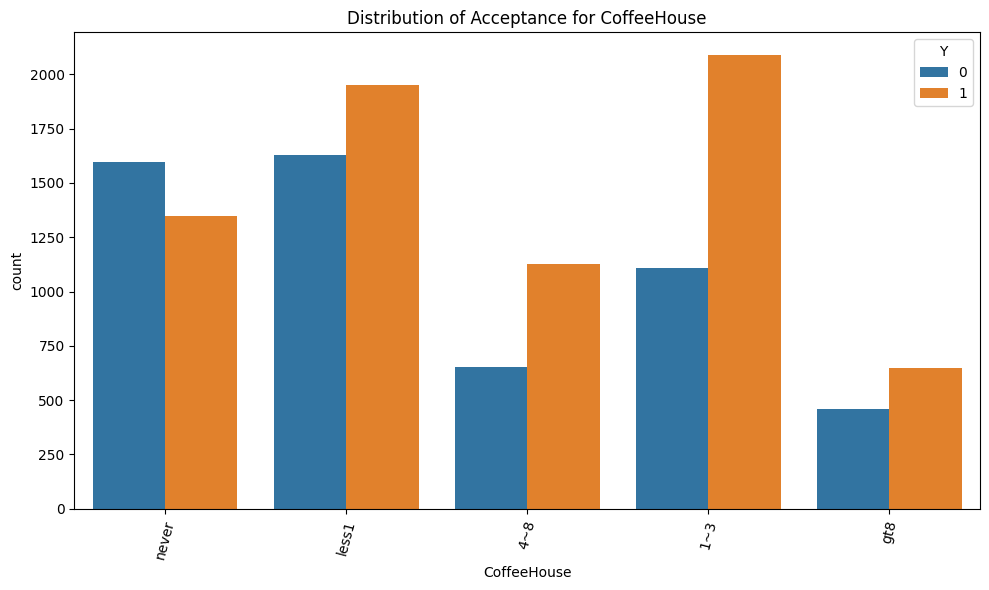

<Figure size 640x480 with 0 Axes>

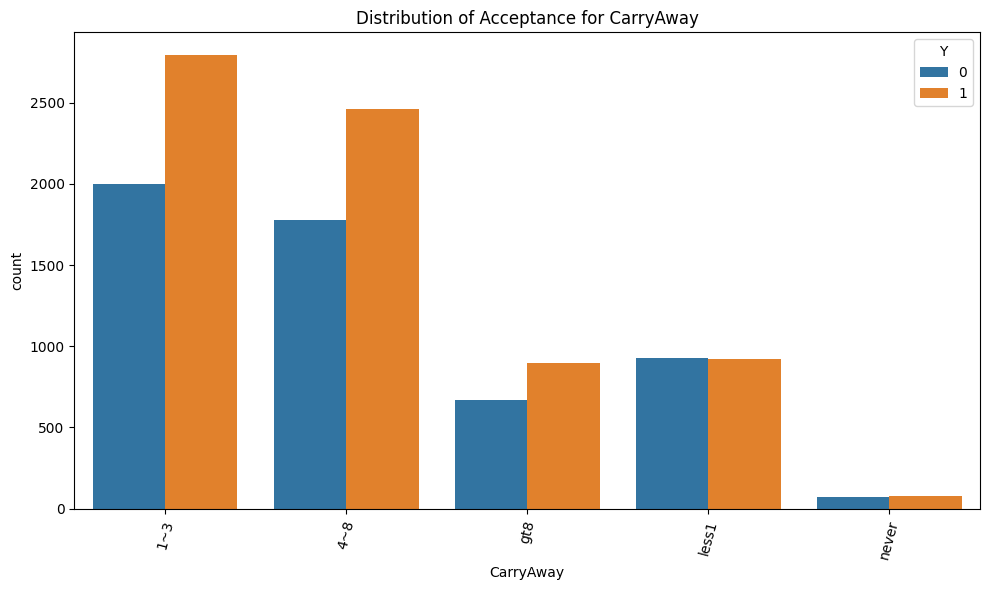

<Figure size 640x480 with 0 Axes>

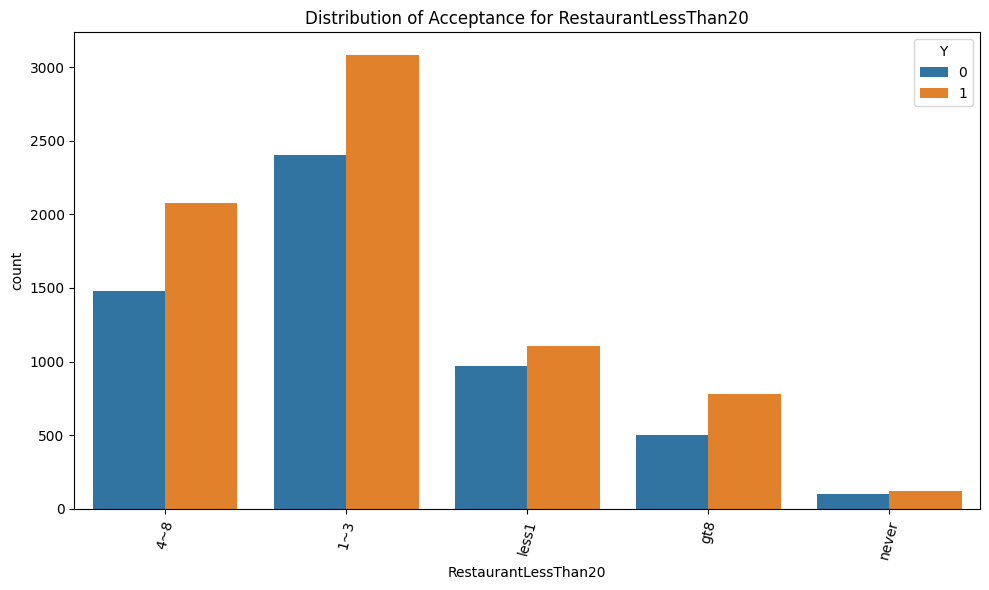

<Figure size 640x480 with 0 Axes>

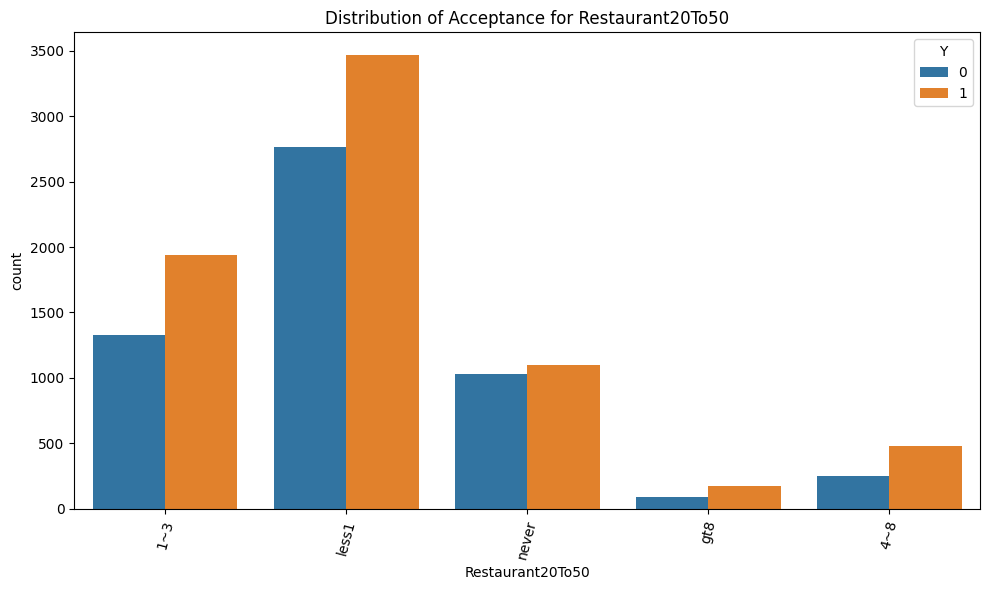

<Figure size 640x480 with 0 Axes>

In [392]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

for col in categorical_columns:
    if col != 'Y':  # Assuming 'credit_class' is also a categorical column
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Y', data=data)
        plt.title(f'Distribution of Acceptance for {col}')
        plt.xticks(rotation=75)
        plt.tight_layout()
        plt.show()
        #Save figure
        plt.savefig(f'images/acceptance_for_{col}.png')

### **More hypothesis using visualization for drivers who accepted the coupons**

*  Drivers going to no urgent place accepts the coupons more than others.
*  Drivers with friends tend to accept coupons more.
*  Weather plays a role in drivers accepting the coupons in general. On sunny days there is more acceptance.
*  Time is a factor in acceptance. People equally accept and reject coupons at 7AM and 10PM. Indicating that coupons are not useful around those times. 10AM, 2PM and 6PM is more favorable.
*  Cheaper restaurants and carry out coupons are more affective than others.
*  1 day expiration coupons are more affective than 2H ones.
*  Gender doesn't seem to play a role in coupon acceptance.
*  Drivers in 21~26 age group accept coupons more than others.  
*  Coupons are more affective for drivers with occupation student.
*  Drivers with income of more than 62,500 tend to equally accept and reject coupons. Drivers below that income range accept coupons more than rejecting the coupons.
*  Drivers who either frequent bars or coffee house or take carry outs or visits cheaper restaurants, 1~3 times a month accept coupons more than others.

---

**Next steps based on limited evidence:**
*  Target more coupons to drivers who don't have any urgent place to go to achieve better success rate.
*  Promote coupons for drivers with friends  and also target more coupons in the 21~26 age group.
*  Avoid targeting during early morning hours and late hours in the day.
*  Increase expiry time of the coupons for better results.


In [393]:
toCoupon_GEQ5mindf = data.query("toCoupon_GEQ5min == 1")

# Calculate proportion
proportion_toCoupon_GEQ5min_accepted = toCoupon_GEQ5mindf['Y'].mean()

# Print result
print(f"Proportion of accepted coupons for toCoupon_GEQ5min: {proportion_toCoupon_GEQ5min_accepted:.2%}")

Proportion of accepted coupons for toCoupon_GEQ5min: 56.76%


In [394]:
toCoupon_GEQ15mindf = data.query("toCoupon_GEQ15min == 1")

# Calculate proportion
proportion_toCoupon_GEQ15min_accepted = toCoupon_GEQ15mindf['Y'].mean()

# Print result
print(f"Proportion of accepted coupons for toCoupon_GEQ15min: {proportion_toCoupon_GEQ15min_accepted:.2%}")

Proportion of accepted coupons for toCoupon_GEQ15min: 53.12%


In [395]:
toCoupon_GEQ25mindf = data.query("toCoupon_GEQ25min == 1")

# Calculate proportion
proportion_toCoupon_GEQ25min_accepted = toCoupon_GEQ25mindf['Y'].mean()

# Print result
print(f"Proportion of accepted coupons for toCoupon_GEQ25min: {proportion_toCoupon_GEQ25min_accepted:.2%}")

Proportion of accepted coupons for toCoupon_GEQ25min: 41.97%
